In [116]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Model evaluation and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Interpretability libraries
import shap
from sklearn.inspection import permutation_importance
from sklearn.tree import export_text

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [117]:
## Loading the dataset into pandas dataframe
df=pd.read_csv('diabetes.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
18564,Female,65.0,1,1,never,33.55,8.2,140,1
18565,Male,55.0,0,1,former,30.42,6.2,300,1
18566,Female,61.0,0,0,No Info,34.45,6.5,280,1
18567,Female,58.0,1,0,never,38.31,7.0,200,1


# Exploratory Data Analysis

Getting to know the data

Data Processing (Missing values)

Cross Tables and data visualisation

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18569 entries, 0 to 18568
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               18569 non-null  object 
 1   age                  18569 non-null  float64
 2   hypertension         18569 non-null  int64  
 3   heart_disease        18569 non-null  int64  
 4   smoking_history      18569 non-null  object 
 5   bmi                  18569 non-null  float64
 6   HbA1c_level          18569 non-null  float64
 7   blood_glucose_level  18569 non-null  int64  
 8   diabetes             18569 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.3+ MB


In [119]:
df.isna().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [120]:

df.describe()  # Dispalying numerical data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,18569.000000,18569.000000,18569.000000,18569.000000,18569.000000,18569.000000,18569.000000
mean,49.733248,0.146319,0.083957,29.233480,6.102946,160.737196,0.457752
std,21.757635,0.353435,0.277331,7.349293,1.274961,56.207784,0.498225
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,35.000000,0.000000,0.000000,25.640000,5.700000,130.000000,0.000000
50%,53.000000,0.000000,0.000000,27.320000,6.100000,155.000000,0.000000
75%,67.000000,0.000000,0.000000,32.500000,6.600000,200.000000,1.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [121]:
df.describe(include='O') # Printing categorical variables ie non-numerical variables

,gender,smoking_history
count,18569,18569
unique,3,6
top,Female,never
freq,10488,6942


In [122]:

## Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
# Only encode if not already encoded
if 'smoking_history' in df.columns:
    df = pd.get_dummies(df, columns=['smoking_history', 'gender'], drop_first=False)
df.head()   

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0,0,1,0


In [123]:
## dropping null values
df=df.dropna(how='any')

In [124]:
df.isna().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
gender_Female                  0
gender_Male                    0
gender_Other                   0
dtype: int64

In [125]:
#relationship between variables
corr=df.corr()
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
age,1.000000,0.251206,0.251970,0.271248,0.283894,0.263387,0.473534,-0.272726,-0.008799,0.054012,0.216195,0.055328,0.053154,-0.007405,0.007956,-0.021462
hypertension,0.251206,1.000000,0.103784,0.163645,0.159124,0.140110,0.258220,-0.133564,0.008524,0.018945,0.080595,0.051100,0.005164,-0.017394,0.017530,-0.005263
heart_disease,0.251970,0.103784,1.000000,0.054349,0.134068,0.119274,0.215686,-0.062159,0.007266,0.055903,0.108413,-0.047293,0.000825,-0.095391,0.095494,-0.003848
bmi,0.271248,0.163645,0.054349,1.000000,0.200359,0.189337,0.344420,-0.209942,0.036635,0.030643,0.101419,0.072849,0.027471,0.024076,-0.023638,-0.017124
HbA1c_level,0.283894,0.159124,0.134068,0.200359,1.000000,0.324191,0.599595,-0.138769,0.028135,0.024256,0.087736,0.025393,0.025964,-0.048921,0.049052,-0.005015
blood_glucose_level,0.263387,0.140110,0.119274,0.189337,0.324191,1.000000,0.545287,-0.115910,0.031605,0.010084,0.080224,0.015422,0.022279,-0.039157,0.039206,-0.001825
diabetes,0.473534,0.258220,0.215686,0.344420,0.599595,0.545287,1.000000,-0.218032,0.033564,0.041841,0.152057,0.037597,0.035873,-0.074108,0.074410,-0.011679
smoking_history_No Info,-0.272726,-0.133564,-0.062159,-0.209942,-0.138769,-0.115910,-0.218032,1.000000,-0.207097,-0.136001,-0.240695,-0.478623,-0.171422,-0.027229,0.027190,0.001591
smoking_history_current,-0.008799,0.008524,0.007266,0.036635,0.028135,0.031605,0.033564,-0.207097,1.000000,-0.073408,-0.129918,-0.258343,-0.092527,-0.030885,0.030995,-0.004250
smoking_history_ever,0.054012,0.018945,0.055903,0.030643,0.024256,0.010084,0.041841,-0.136001,-0.073408,1.000000,-0.085318,-0.169655,-0.060763,-0.030259,0.030331,-0.002791


Text(0, 0.5, 'Count')

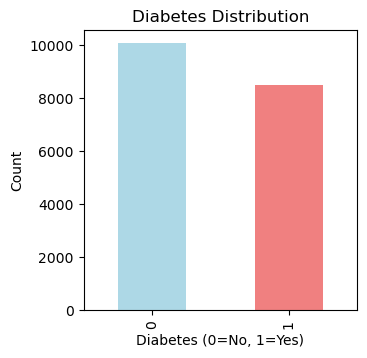

In [126]:
# Visualize class distribution
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
df['diabetes'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('Count')

In [127]:
from sklearn.utils import resample
majority_class = df[df.diabetes == 0]
minority_class = df[df.diabetes == 1]


print("Majority class size:", len(majority_class))
print("Minority class size:", len(minority_class))



Majority class size: 10069
Minority class size: 8500


In [128]:
# minority_class_upsampled = resample(minority_class,
#                                     replace=True,
#                                     n_samples=9000,
#                                     random_state=999)

# df_upsampled = pd.concat([majority_class, minority_class_upsampled])

# df_upsampled['diabetes'].value_counts()

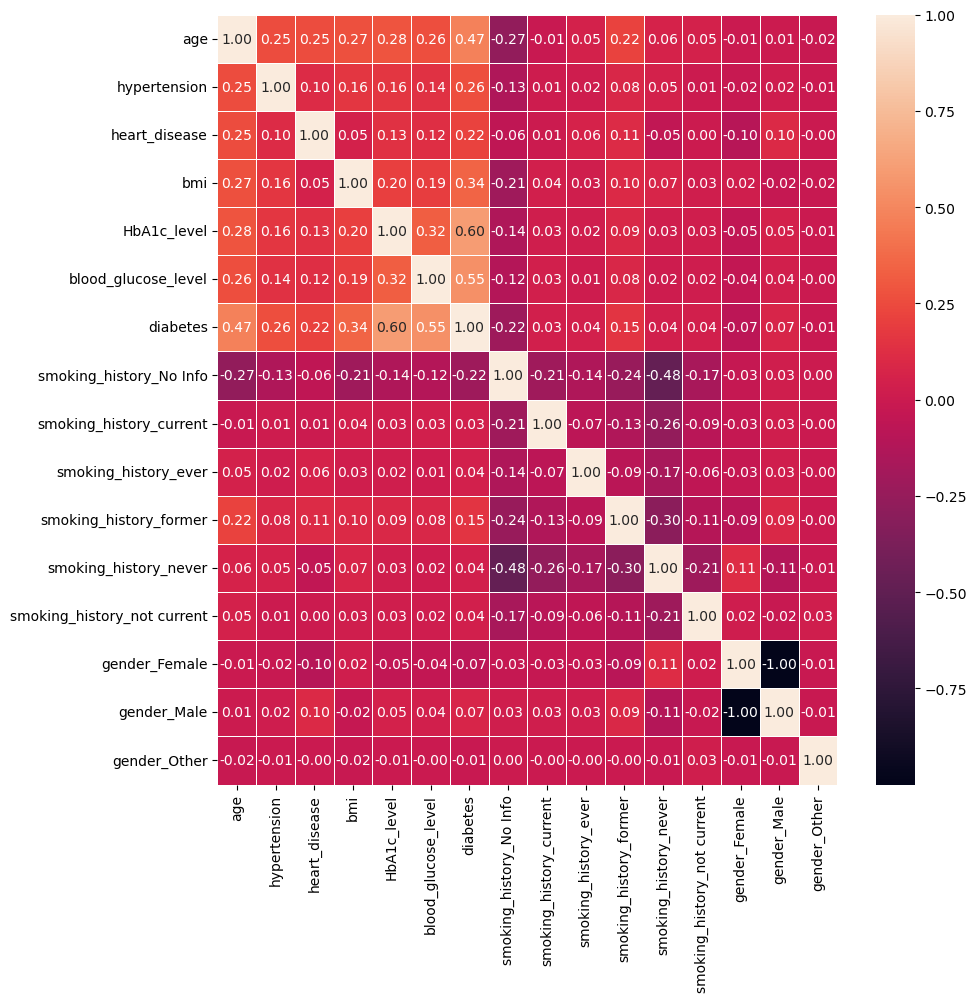

In [129]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,fmt='0.2f')
plt.show()

 # Feature Engineering

 Splitting the data into features and target variables

In [130]:

# ## Splitting the data into features and target variable
# X = df_upsampled.drop('diabetes', axis=1)
# y = df_upsampled['diabetes']

# print("Feature matrix shape:", X.shape)
# print("Target vector shape:", y.shape)


## Splitting the data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (18569, 15)
Target vector shape: (18569,)


In [131]:
# Split the data (with stratification to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f" Completes set: {X.shape[0]} samples")
print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")




 Completes set: 18569 samples

Train set: 14855 samples
Test set: 3714 samples


In [132]:
# Feature Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model development and training

In [133]:
# Initializing models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1, max_depth=3),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'SVM': SVC(class_weight='balanced', random_state=42, probability=True, kernel='rbf')
}

# Training individual models and store results
individual_models = {}
individual_predictions = {}
individual_probabilities = {}

print("Training individual models...")
print("="*50)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Using scaled data for LR and SVM and  original data for RF
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
        test_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        test_proba = model.predict_proba(X_test)[:, 1]
    
    # Store model and predictions
    individual_models[name] = model
    individual_predictions[name] = test_pred
    individual_probabilities[name] = test_proba
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred, zero_division=0)
    test_recall = recall_score(y_test, test_pred, zero_division=0)
    test_f1 = f1_score(y_test, test_pred, zero_division=0)
    
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    print(f"Confusion Matrix:\n{cm}")

print("\nIndividual model training completed!")

Training individual models...

Training Random Forest...
Train Accuracy: 0.9005
Test Accuracy: 0.8966
Test Precision: 0.9032
Test Recall: 0.8671
Test F1-Score: 0.8848
Confusion Matrix:
[[1856  158]
 [ 226 1474]]

Training Logistic Regression...
Train Accuracy: 0.8845
Test Accuracy: 0.8858
Test Precision: 0.8692
Test Recall: 0.8835
Test F1-Score: 0.8763
Confusion Matrix:
[[1788  226]
 [ 198 1502]]

Training SVM...
Train Accuracy: 0.8930
Test Accuracy: 0.8899
Test Precision: 0.8678
Test Recall: 0.8959
Test F1-Score: 0.8816
Confusion Matrix:
[[1782  232]
 [ 177 1523]]

Individual model training completed!


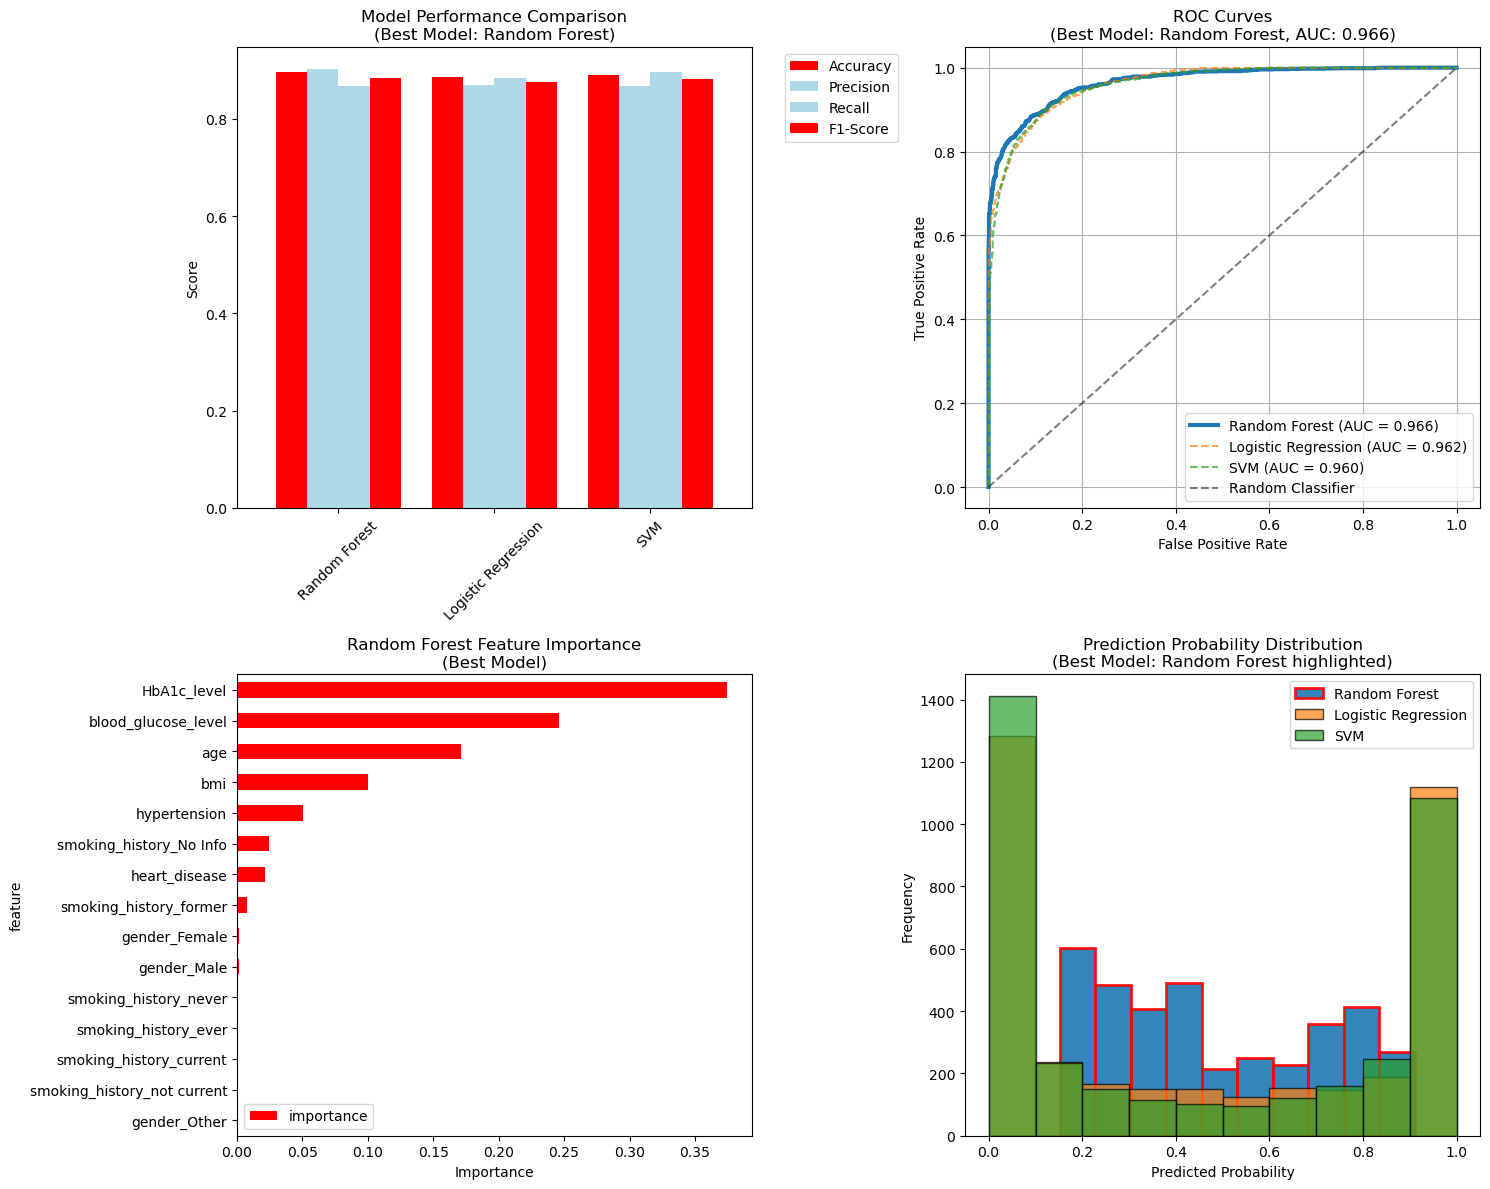


Model Performance Summary:
                     Accuracy  Precision  Recall  F1-Score
Random Forest          0.8966     0.9032  0.8671    0.8848
Logistic Regression    0.8858     0.8692  0.8835    0.8763
SVM                    0.8899     0.8678  0.8959    0.8816

Best Model: Random Forest
Average Score: 0.8879

Detailed Performance for Best Model (Random Forest):
----------------------------------------
Accuracy: 0.8966
Precision: 0.9032
Recall: 0.8671
F1-Score: 0.8848


In [134]:
    
# Create performance comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Performance Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_names = list(individual_models.keys())
performance_data = []

# Find best model for each metric
best_models = {}
for name in model_names:
    if name in ['Logistic Regression', 'SVM']:
        test_pred = individual_models[name].predict(X_test_scaled)
    else:
        test_pred = individual_models[name].predict(X_test)
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred, zero_division=0)
    recall = recall_score(y_test, test_pred, zero_division=0)
    f1 = f1_score(y_test, test_pred, zero_division=0)
    performance_data.append([accuracy, precision, recall, f1])

performance_df = pd.DataFrame(performance_data, columns=metrics, index=model_names)

# Find best model (highest average score across all metrics)
performance_df['Average_Score'] = performance_df.mean(axis=1)
best_model_name = performance_df['Average_Score'].idxmax()
best_model_avg_score = performance_df.loc[best_model_name, 'Average_Score']
performance_df = performance_df.drop('Average_Score', axis=1)  # Remove average column for plotting

# Bar plot of performance metrics with best model highlighted
ax1 = axes[0, 0]
colors = ['lightblue' if name != best_model_name else 'red' for name in model_names]
performance_df.plot(kind='bar', ax=ax1, width=0.8, color=colors)
ax1.set_title(f'Model Performance Comparison\n(Best Model: {best_model_name})')
ax1.set_ylabel('Score')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(model_names, rotation=45)

# 2. ROC Curves with best model highlighted
ax2 = axes[0, 1]
best_auc = 0
best_model_roc = None

for name in model_names:
    fpr, tpr, _ = roc_curve(y_test, individual_probabilities[name])
    auc_score = roc_auc_score(y_test, individual_probabilities[name])
    
    # Track best AUC score
    if auc_score > best_auc:
        best_auc = auc_score
        best_model_roc = name
    
    linewidth = 3 if name == best_model_name else 1.5
    linestyle = '-' if name == best_model_name else '--'
    alpha = 1.0 if name == best_model_name else 0.7
    
    ax2.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', 
             linewidth=linewidth, linestyle=linestyle, alpha=alpha)

ax2.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title(f'ROC Curves\n(Best Model: {best_model_name}, AUC: {best_auc:.3f})')
ax2.legend()
ax2.grid(True)

# 3. Feature Importance (Random Forest)
ax3 = axes[1, 0]
rf_importance = individual_models['Random Forest'].feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_importance
}).sort_values('importance', ascending=True)

# Highlight if Random Forest is the best model
color = 'red' if 'Random Forest' == best_model_name else 'lightblue'
importance_df.plot(x='feature', y='importance', kind='barh', ax=ax3, color=color)
ax3.set_title(f'Random Forest Feature Importance\n({"Best Model" if "Random Forest" == best_model_name else "Not Best Model"})')
ax3.set_xlabel('Importance')

# 4. Prediction Probabilities Distribution with best model highlighted
ax4 = axes[1, 1]
for name in model_names:
    alpha = 0.7 if name != best_model_name else 0.9
    edgecolor = 'red' if name == best_model_name else 'black'
    linewidth = 2 if name == best_model_name else 1
    ax4.hist(individual_probabilities[name], alpha=alpha, label=name, bins=10, 
             edgecolor=edgecolor, linewidth=linewidth)

ax4.set_xlabel('Predicted Probability')
ax4.set_ylabel('Frequency')
ax4.set_title(f'Prediction Probability Distribution\n(Best Model: {best_model_name} highlighted)')
ax4.legend()

plt.tight_layout()
plt.show()

# Print performance summary with best model highlighted
print("\nModel Performance Summary:")
print("=" * 50)
print(performance_df.round(4))

print(f"\nBest Model: {best_model_name}")
print(f"Average Score: {best_model_avg_score:.4f}")
print("=" * 50)

# Print detailed metrics for the best model
print(f"\nDetailed Performance for Best Model ({best_model_name}):")
print("-" * 40)
for metric in metrics:
    score = performance_df.loc[best_model_name, metric]
    print(f"{metric}: {score:.4f}")

In [135]:
import numpy as np
import pandas as pd

# Use the best model (Random Forest) to make predictions
best_model = individual_models['Random Forest']

# Example input (replace with real values matching your feature order)
sample_data = pd.DataFrame([{
    'age': 69,
    'hypertension': 0,
    'heart_disease': 0,
    'bmi': 21.24,
    'HbA1c_level': 4.8,
    'blood_glucose_level': 85,
    'smoking_history_No Info': 0,
    'smoking_history_current': 0,
    'smoking_history_ever': 0,
    'smoking_history_former': 0,
    'smoking_history_never': 1,
    'smoking_history_not current': 0,
    'gender_Female': 1,
    'gender_Male': 0,
    'gender_Other': 0
}])

# Make prediction using Random Forest (uses original data, not scaled)
prediction = best_model.predict(sample_data)
probability = best_model.predict_proba(sample_data)[:, 1]

print("=" * 50)
print("PREDICTION USING BEST MODEL (RANDOM FOREST)")
print("=" * 50)
print(f"Predicted class: {prediction[0]}")
print(f"Probability of Diabetes: {probability[0]:.4f}")
print(f"Confidence: {probability[0] * 100:.2f}%")

# Interpret the prediction
if prediction[0] == 1:
    print("Prediction: DIABETES (Positive)")
else:
    print("Prediction: NO DIABETES (Negative)")

print("\nInput Features:")
print("=" * 30)
for feature, value in sample_data.iloc[0].items():
    print(f"{feature}: {value}")

PREDICTION USING BEST MODEL (RANDOM FOREST)
Predicted class: 0
Probability of Diabetes: 0.2747
Confidence: 27.47%
Prediction: NO DIABETES (Negative)

Input Features:
age: 69.0
hypertension: 0.0
heart_disease: 0.0
bmi: 21.24
HbA1c_level: 4.8
blood_glucose_level: 85.0
smoking_history_No Info: 0.0
smoking_history_current: 0.0
smoking_history_ever: 0.0
smoking_history_former: 0.0
smoking_history_never: 1.0
smoking_history_not current: 0.0
gender_Female: 1.0
gender_Male: 0.0
gender_Other: 0.0


In [136]:


import matplotlib.pyplot as plt
import lime
import lime.lime_tabular
import shap
from sklearn.inspection import permutation_importance






1. GLOBAL FEATURE IMPORTANCE
List of Features by Importance:
--------------------------------------------------
HbA1c_level: 0.3748
blood_glucose_level: 0.2459
age: 0.1713
bmi: 0.0998
hypertension: 0.0504
smoking_history_No Info: 0.0241
heart_disease: 0.0217
smoking_history_former: 0.0078
gender_Female: 0.0017
gender_Male: 0.0016
smoking_history_never: 0.0005
smoking_history_ever: 0.0001
smoking_history_current: 0.0001
smoking_history_not current: 0.0001
gender_Other: 0.0000


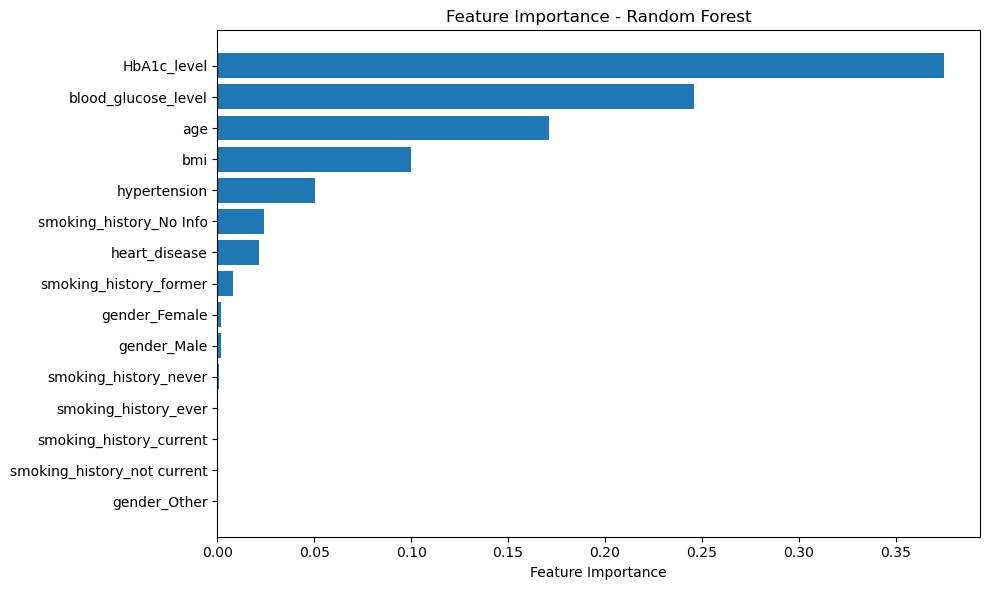

In [137]:
print("\n" + "="*60)
print("1. GLOBAL FEATURE IMPORTANCE")
print("="*60)

# Built-in Feature Importance
feature_importance = best_model.feature_importances_
feature_names = sample_data.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("List of Features by Importance:")
print("-" * 50)
for i, row in importance_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


3. LIME EXPLANATION
Intercept 0.6024026306464157
Prediction_local [0.29566989]
Right: 0.27468484129381016
LIME Explanation:
--------------------------------------------------


<Figure size 1000x600 with 0 Axes>

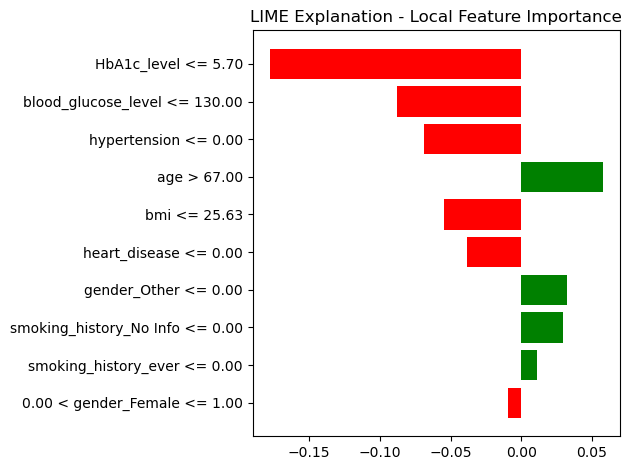


LIME Text Explanation:
------------------------------
HbA1c_level <= 5.70: -0.1781
blood_glucose_level <= 130.00: -0.0880
hypertension <= 0.00: -0.0686
age > 67.00: 0.0579
bmi <= 25.63: -0.0547
heart_disease <= 0.00: -0.0384
gender_Other <= 0.00: 0.0325
smoking_history_No Info <= 0.00: 0.0292
smoking_history_ever <= 0.00: 0.0110
0.00 < gender_Female <= 1.00: -0.0096


In [138]:

print("\n" + "="*60)
print("3. LIME EXPLANATION")
print("="*60)

# You'll need your training data for LIME
# Assuming you have X_train from your original training
# If not, you might need to recreate or load it

# Create LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values if 'X_train' in locals() else sample_data.values,  # Use available data
    feature_names=feature_names,
    class_names=['No Diabetes', 'Diabetes'],
    mode='classification',
    verbose=True,
    random_state=42
)

# Explain the instance
exp = explainer_lime.explain_instance(
    sample_data.iloc[0].values, 
    best_model.predict_proba, 
    num_features=10
)

print("LIME Explanation:")
print("-" * 50)

# Show in console
exp.show_in_notebook(show_table=True)

# Plot explanation
plt.figure(figsize=(10, 6))
exp.as_pyplot_figure()
plt.title('LIME Explanation - Local Feature Importance')
plt.tight_layout()
plt.show()

# Print explanation in text format
print("\nLIME Text Explanation:")
print("-" * 30)
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")

In [139]:
# print("\n" + "="*60)
# print("2. SHAP EXPLANATION")
# print("="*60)

# # Create SHAP explainer
# explainer = shap.TreeExplainer(best_model)

# # Calculate SHAP values for the sample - ensure we get the right shape
# shap_values = explainer(sample_data)


# shap.plots.waterfall(shap_values[0])



2. SHAP EXPLANATION


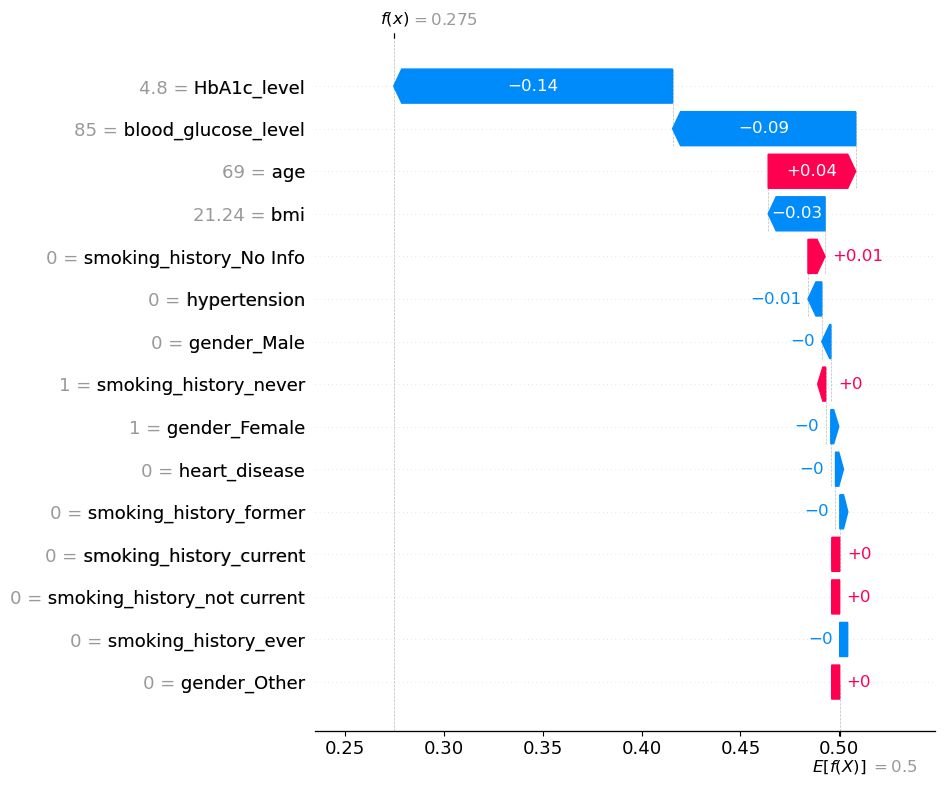

In [ ]:
print("\n" + "="*60)
print("2. SHAP EXPLANATION")
print("="*60)

# Create SHAP explainer
explainer = shap.TreeExplainer(best_model)

shap_values = explainer.shap_values(sample_data)
shap_values_all = explainer(sample_data)
shap.plots.waterfall(shap_values_all[0, :, 1], max_display=20)
plt.show()


SHAP SUMMARY PLOTS
X_test shape: (3714, 15)
shap_values shape: (3714, 15, 2)


<Figure size 1000x800 with 0 Axes>

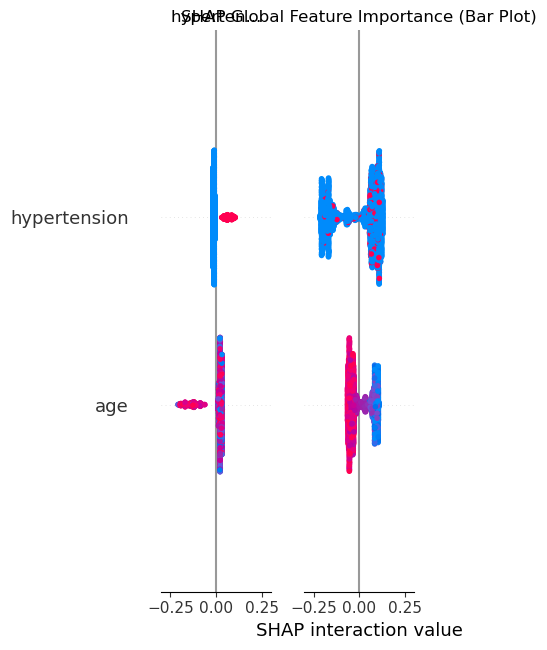

In [150]:
# shap.summary_plot(shap_values, X_test, plot_type="bar")

print("\n" + "="*60)
print("SHAP SUMMARY PLOTS")
print("="*60)

# Create SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

print(f"X_test shape: {X_test.shape}")

# Check the structure of shap_values
if isinstance(shap_values, list):
    print(f"shap_values is a list with {len(shap_values)} elements")
    for i, shaps in enumerate(shap_values):
        print(f"shap_values[{i}] shape: {shaps.shape}")
    
    # For binary classification, we usually want class 1 (positive class)
    shap_values_class1 = shap_values[1]
    print(f"Using shap_values[1] for class 1, shape: {shap_values_class1.shape}")
    
else:
    print(f"shap_values shape: {shap_values.shape}")
    shap_values_class1 = shap_values

# Ensure the shapes match
assert shap_values_class1.shape[0] == X_test.shape[0], f"Shape mismatch: SHAP values {shap_values_class1.shape[0]} samples, X_test {X_test.shape[0]} samples"


plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_class1, X_test, plot_type="bar", show=False)
plt.title("SHAP Global Feature Importance (Bar Plot)")
plt.tight_layout()
plt.show()

In [ ]:
# # Check for missing values
# print("Missing values:")
# print(df.isnull().sum())

# # Check class distribution
# print("\nClass distribution:")
# print(df['diabetes'].value_counts())
# print(f"\nClass balance: {df['diabetes'].value_counts(normalize=True)}")

# # Visualize class distribution
# plt.figure(figsize=(12, 8))

# plt.subplot(2, 3, 1)
# df['diabetes'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
# plt.title('Diabetes Distribution')
# plt.xlabel('Diabetes (0=No, 1=Yes)')
# plt.ylabel('Count')

# # Age distribution by diabetes status
# plt.subplot(2, 3, 2)
# df.boxplot(column='age', by='diabetes', ax=plt.gca())
# plt.title('Age Distribution by Diabetes Status')
# plt.xlabel('Diabetes Status')
# plt.ylabel('Age')

# # BMI distribution by diabetes status
# plt.subplot(2, 3, 3)
# df.boxplot(column='bmi', by='diabetes', ax=plt.gca())
# plt.title('BMI Distribution by Diabetes Status')
# plt.xlabel('Diabetes Status')
# plt.ylabel('BMI')

# # HbA1c level distribution by diabetes status
# plt.subplot(2, 3, 4)
# df.boxplot(column='HbA1c_level', by='diabetes', ax=plt.gca())
# plt.title('HbA1c Level Distribution by Diabetes Status')
# plt.xlabel('Diabetes Status')
# plt.ylabel('HbA1c Level')

# # Blood glucose level distribution by diabetes status
# plt.subplot(2, 3, 5)
# df.boxplot(column='blood_glucose_level', by='diabetes', ax=plt.gca())
# plt.title('Blood Glucose Level Distribution by Diabetes Status')
# plt.xlabel('Diabetes Status')
# plt.ylabel('Blood Glucose Level')

# # Correlation heatmap for numerical features
# plt.subplot(2, 3, 6)
# numerical_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
# correlation_matrix = df[numerical_cols].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=plt.gca())
# plt.title('Feature Correlation Matrix')

# plt.tight_layout()
# plt.show()

# # Additional categorical analysis
# print("\nCategorical feature analysis:")
# print("Gender distribution by diabetes:")
# print(pd.crosstab(df['gender'], df['diabetes'], normalize='columns'))
# print("\nSmoking history distribution by diabetes:")
# print(pd.crosstab(df['smoking_history'], df['diabetes'], normalize='columns'))

In [ ]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# import matplotlib.pyplot as plt
# import numpy as np

# # Visualizing the original class distribution
# plt.figure(figsize=(6, 4))
# df['Diabetes'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
# plt.title('Diabetes Distribution')
# plt.xlabel('Diabetes (0=No, 1=Yes)')
# plt.ylabel('Count')
# plt.show()

# # Separate features and target
# X = df.drop('Diabetes', axis=1)  # Features (empty in this case)
# y = df['Diabetes']                # Target

# # Oversampling using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Visualizing the oversampled class distribution
# plt.figure(figsize=(6, 4))
# pd.Series(y_resampled).value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
# plt.title('Diabetes Distribution After SMOTE')
# plt.xlabel('Diabetes (0=No, 1=Yes)')
# plt.ylabel('Count')
# plt.show()

# # Undersampling using RandomUnderSampler
# undersampler = RandomUnderSampler(random_state=42)
# X_resampled_undersampled, y_resampled_undersampled = undersampler.fit_resample(X, y)

# # Visualizing the undersampled class distribution
# plt.figure(figsize=(6, 4))
# pd.Series(y_resampled_undersampled).value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
# plt.title('Diabetes Distribution After Undersampling')
# plt.xlabel('Diabetes (0=No, 1=Yes)')
# plt.ylabel('Count')
# plt.show()

In [ ]:
#  rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)                                                                          │
#  │     44 lr_clf = LogisticRegression(random_state=42, max_iter=1000)                                                                                 │
#  │     45 svm_clf = SVC(probability=True, random_state=42)                                                                                            │
#  │     46                                                                                                                                             │
#  │     47 # Create the ensemble model with a VotingClassifier                                                                                         │
#  │     48 ensemble_clf = VotingClassifier(                                                                                                            │
#  │     49     estimators=[('rf', rf_clf), ('lr', lr_clf), ('svm', svm_clf)],                                                                          │
#  │     50     voting='soft'                                                                                                                           │
#  │     51 )                                                                                                                                           │
#  │     52                                                                                                                                             │
#  │     53 # Create the full pipeline                                                                                                                  │
#  │     54 pipeline = Pipeline(steps=[('preprocessor', preprocessor),                                                                                  │
#  │     55                             ('classifier', ensemble_clf)])                                                                                  │
#  │     56                                                                                                                                             │
#  │     57 # Train the model                                                                                                                           │
#  │     58 pipeline.fit(X_train, y_train)                                                                                                              │
#  │     59                                                                                                                                             │
#  │     60 # Save the trained model to a pickle file                                                                                                   │
#  │     61 with open('ensemble_model.pkl', 'wb') as f:                                                                                                 │
#  │     62     pickle.dump(pipeline, f)                                                                                                                │
#  │     63                                                                                                                                             │
#  │     64 print("Model trained and saved as ensemble_model.pkl")                                                                                      │
#  │     65                                                                                                                                             │
#  │     66 # Load the saved model                                                                                                                      │
#  │     67 with open('ensemble_model.pkl', 'rb') as f:                                                                                                 │
#  │     68     loaded_model = pickle.load(f)                                                                                                           │
#  │     69                                                                                                                                             │
#  │     70 print("Model loaded from ensemble_model.pkl")                                                                                               │
#  │     71                                                                                                                                             │
#  │     72 # Create a sample data point for prediction                                                                                                 │
#  │     73 sample_data = pd.DataFrame({                                                                                                                │
#  │     74     'gender': ['Female'],                                                                                                                   │
#  │     75     'age': [80.0],                                                                                                                          │
#  │     76     'hypertension': [0],                                                                                                                    │
#  │     77     'heart_disease': [1],                                                                                                                   │
#  │     78     'smoking_history': ['never'],                                                                                                           │
#  │     79     'bmi': [25.19],                                                                                                                         │
#  │     80     'HbA1c_level': [6.6],                                                                                                                   │
#  │     81     'blood_glucose_level': [140]                                                                                                            │
#  │     82 })                                                                                                                                          │
#  │     83                                                                                                                                             │
#  │     84 # Make a prediction                                                                                                                         │
#  │     85 prediction = loaded_model.predict(sample_data)                                                                                              │
#  │     86 prediction_proba = loaded_model.predict_proba(sample_data)                                                                                  │
#  │     87                                                                                                                                             │
#  │     88 print(f"\nPrediction for sample data: {{'Diabetic' if prediction[0] == 1 else 'Not Diabetic'}}")                                            │
#  │     89 print(f"Prediction probabilities: {prediction_proba}")                                                                                      │
#  │     90                                                                                                                                             │
#  │     91 # Explain the prediction with SHAP                                                                                                          │
#  │     92 # Create a SHAP explainer for the loaded model                                                                                              │
#  │     93 explainer = shap.KernelExplainer(loaded_model.predict_proba, shap.sample(X_train, 100))                                                     │
#  │     94                                                                                                                                             │
#  │     95 # Get the feature names after one-hot encoding                                                                                              │
#  │     96 ohe_feature_names = loaded_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)         │
#  │     97 feature_names = numerical_features + list(ohe_feature_names)                                                                                │
#  │     98                                                                                                                                             │
#  │     99 # Transform the sample data using the preprocessor                                                                                          │
#  │    100 transformed_sample = loaded_model.named_steps['preprocessor'].transform(sample_data)                                                        │
#  │    101                                                                                                                                             │
#  │    102 # Calculate SHAP values for the sample data                                                                                                 │
#  │    103 shap_values = explainer.shap_values(transformed_sample)                                                                                     │
#  │    104                                                                                                                                             │
#  │    105 # Generate a force plot to explain the prediction                                                                                           │
#  │    106 shap.initjs()                                                                                                                               │
#  │    107 force_plot = shap.force_plot(explainer.expected_value[1], shap_values[1], transformed_sample, feature_names=feature_names, show=False)      │
#  │    108 shap.save_html("shap_explanation.html", force_plot)                                                                                         │
#  │    109                                                                                                                                             │
#  │    110                                                                                                                                             │
#  │    111 print("\nSHAP explanation for the prediction has been saved to shap_explanation.html")    

In [ ]:
# import pandas as pd
# import numpy as np

# ## Loading the dataset into pandas dataframe
# df=pd.read_csv('diabetes_dataset.csv')
# df

In [ ]:
# ## Encoding categorical variables
# from sklearn.preprocessing import LabelEncoder
# # Only encode if not already encoded
# if 'smoking_history' in df.columns:
#     df = pd.get_dummies(df, columns=['smoking_history', 'gender'], drop_first=False)
# df.head()   

In [ ]:
# ## Splitting the data into features and target variable
# X = df.drop('diabetes', axis=1)
# y = df['diabetes']

# print("Feature matrix shape:", X.shape)
# print("Target vector shape:", y.shape)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Check class distribution
# print(y.value_counts(normalize=True))

# # Visualize imbalance
# sns.countplot(x=y)
# plt.title("Diabetes Distribution")
# plt.show()


In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# print("Before:", y.value_counts())
# print("After:", y_resampled.value_counts())


In [ ]:
# sns.countplot(x=y_resampled)
# plt.title("Diabetes Distribution")
# plt.show()